# Module 2: Exploration data analysis of visualization and training a model by given attributes

In [1]:
#import library packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("data.csv")

In [4]:
df = data.dropna()

In [5]:
df.columns

Index(['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor',
       'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address',
       'Result'],
      dtype='object')

In [6]:
df.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


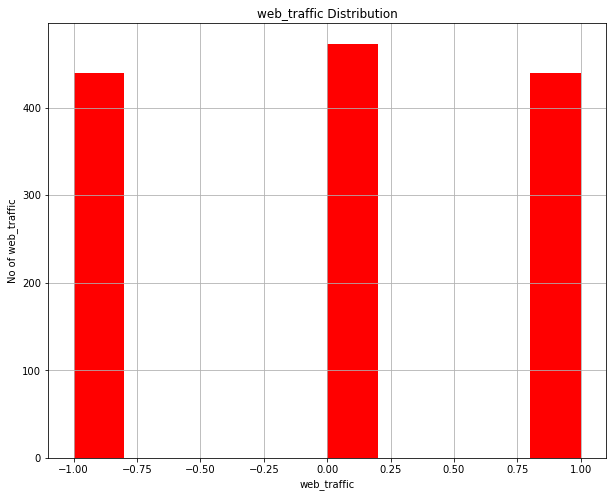

In [7]:
#Histogram Plot of Age distribution
df["web_traffic"].hist(figsize=(10,8), color="red")
plt.title("web_traffic Distribution")
plt.xlabel("web_traffic")
plt.ylabel("No of web_traffic")
plt.show()

-1    51.88
 1    40.50
 0     7.61
Name: Result, dtype: float64

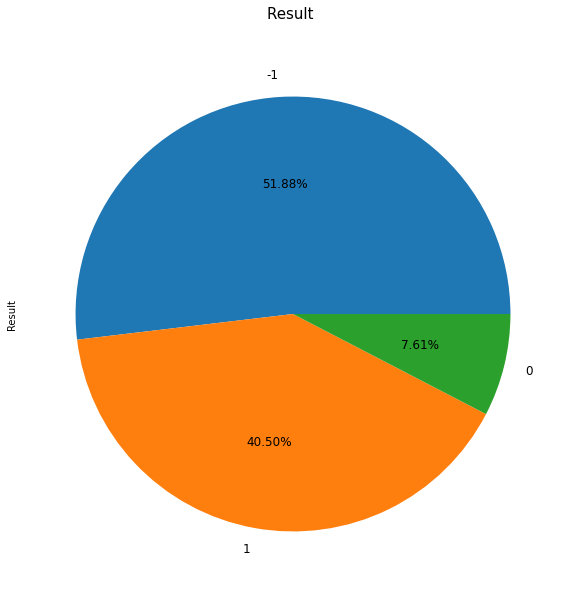

In [8]:
#Propagation by variable
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' \n', fontsize = 15)
    return np.round(dataframe_pie/df.shape[0]*100,2)
PropByVar(df, 'Result')

 0    41.61
-1    31.86
 1    26.53
Name: URL_Length, dtype: float64

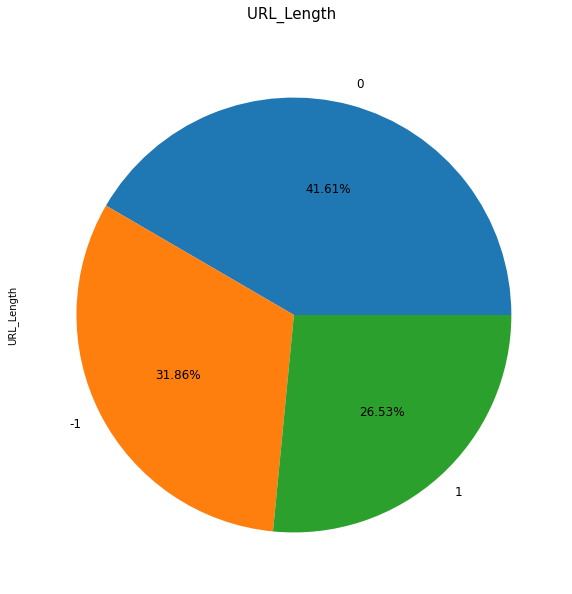

In [9]:
#Propagation by variable
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' \n', fontsize = 15)
    return np.round(dataframe_pie/df.shape[0]*100,2)
PropByVar(df, 'URL_Length')

0    88.54
1    11.46
Name: having_IP_Address, dtype: float64

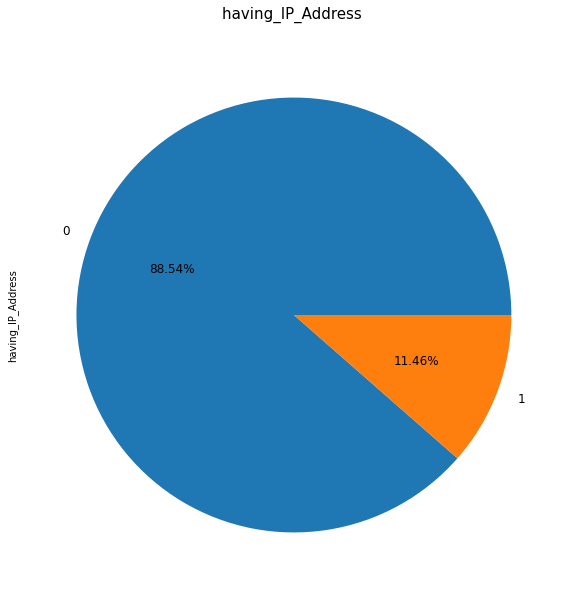

In [10]:
#Propagation by variable
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' \n', fontsize = 15)
    return np.round(dataframe_pie/df.shape[0]*100,2)
PropByVar(df, 'having_IP_Address')

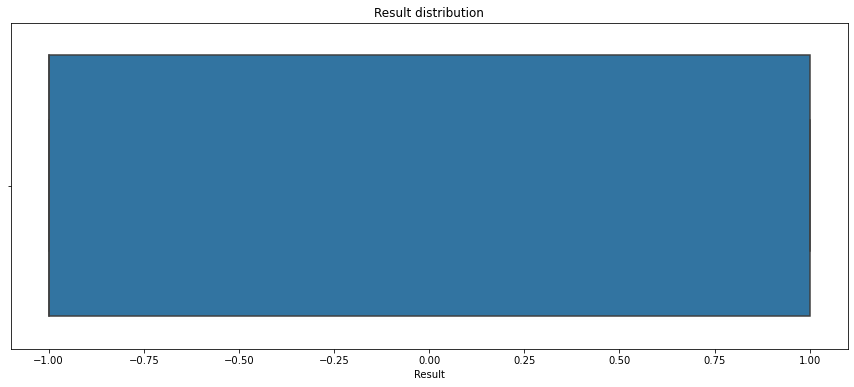

In [11]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(df.Result, ax =ax)
plt.title("Result distribution")
plt.show()

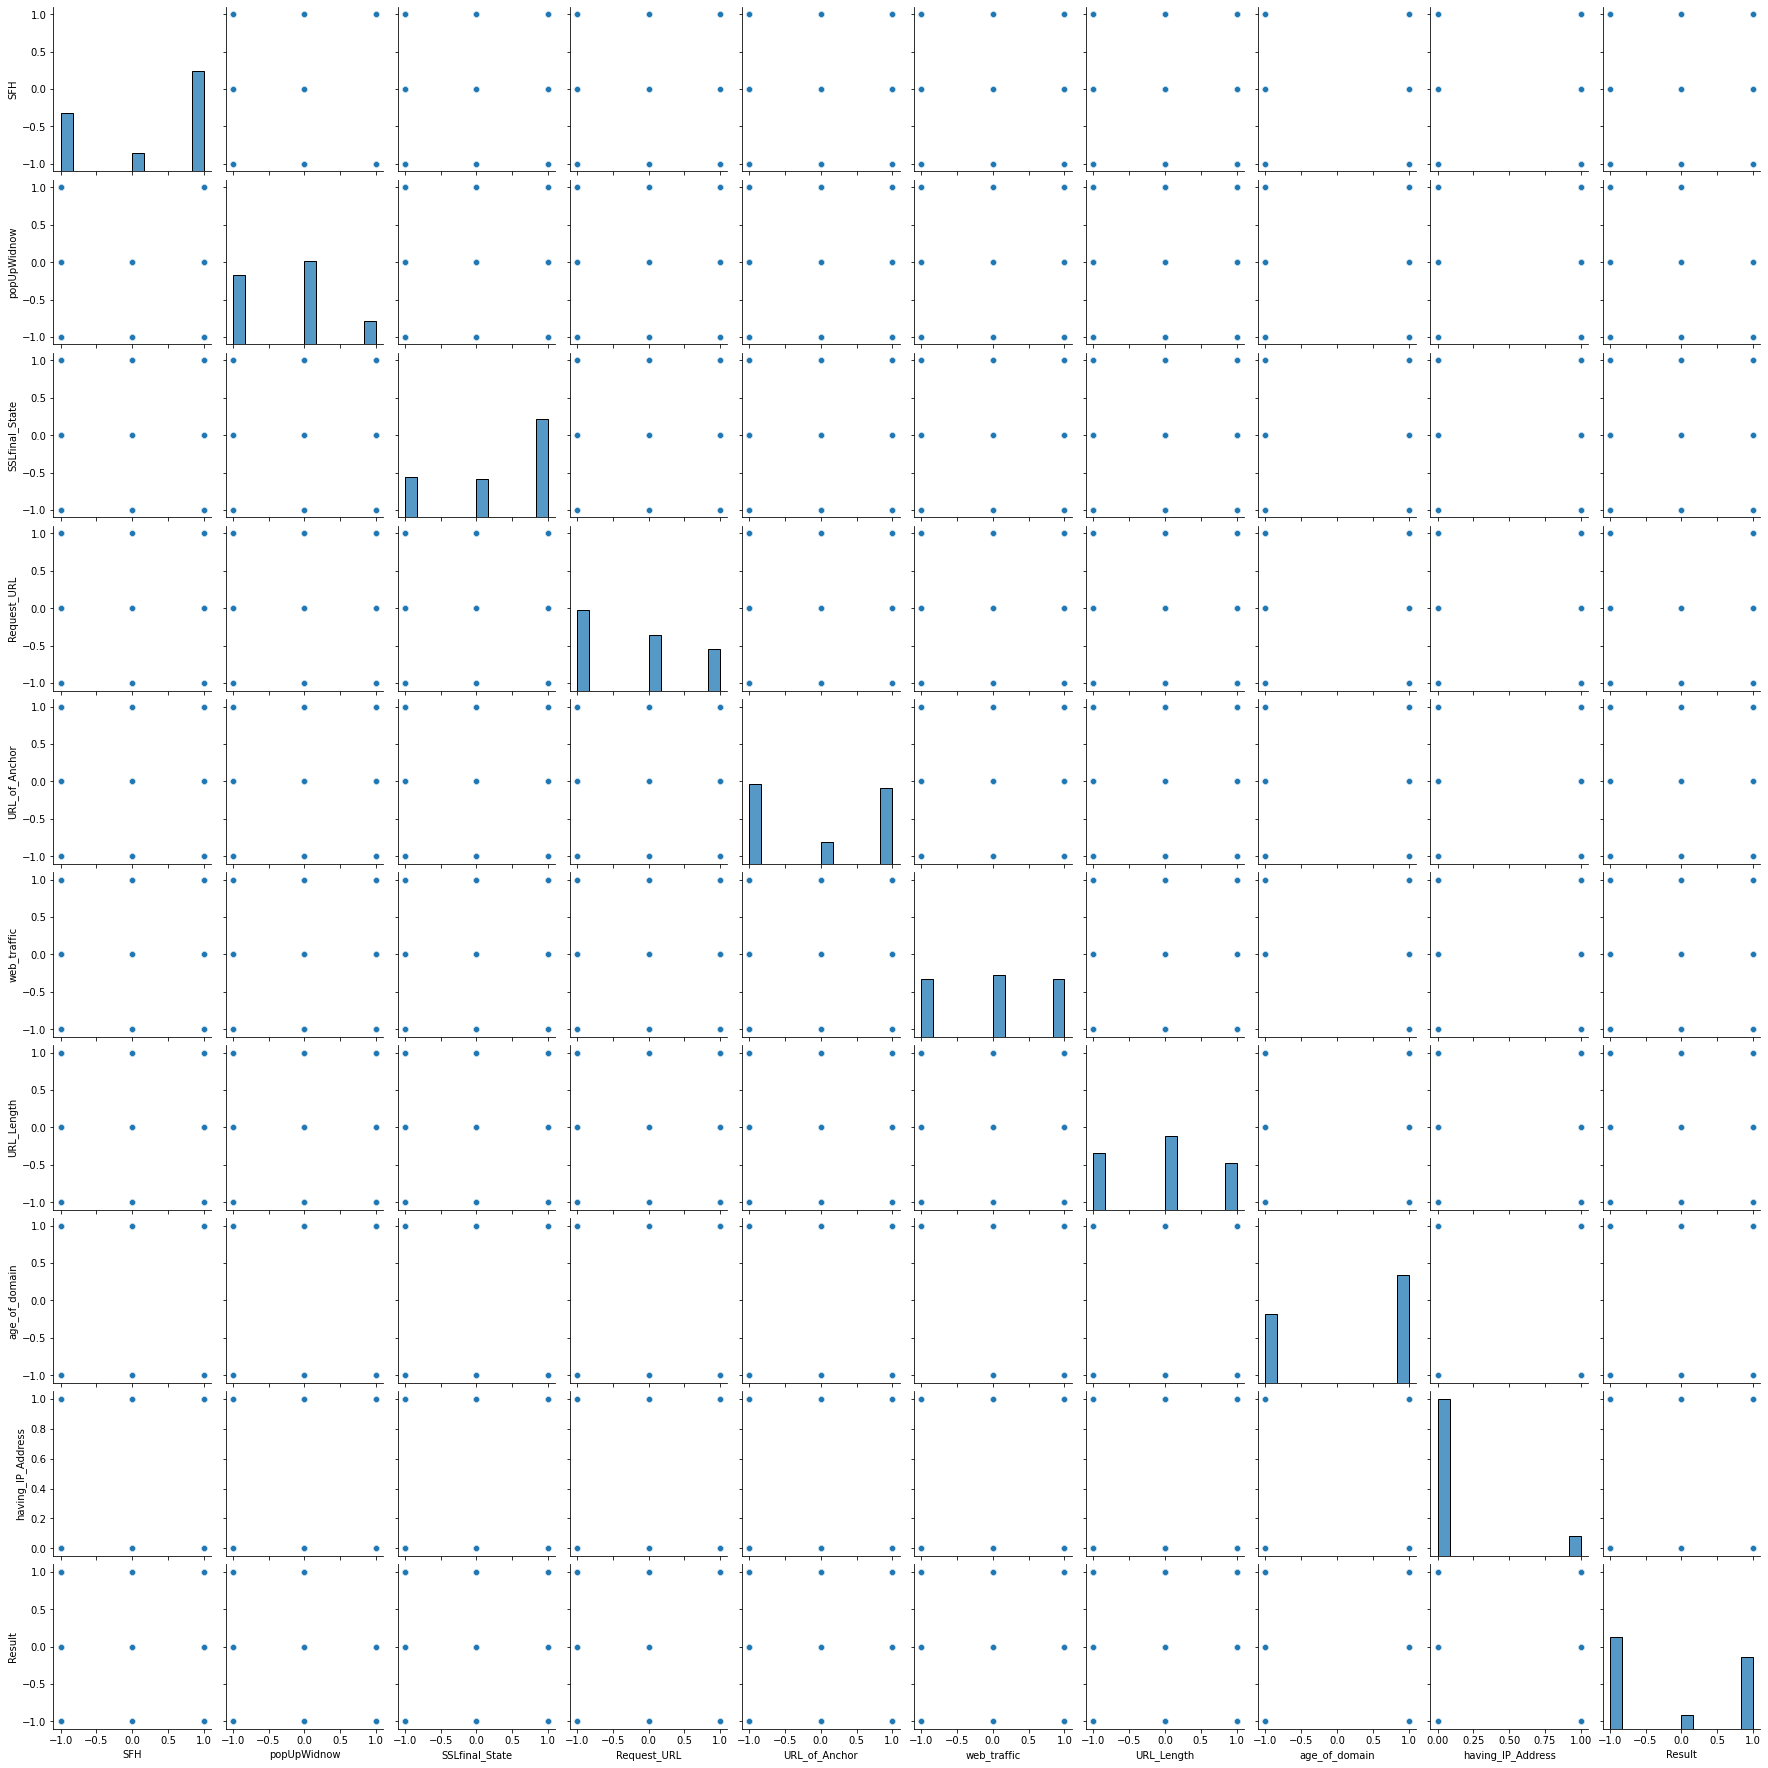

In [12]:
sns.pairplot(df)
plt.show()

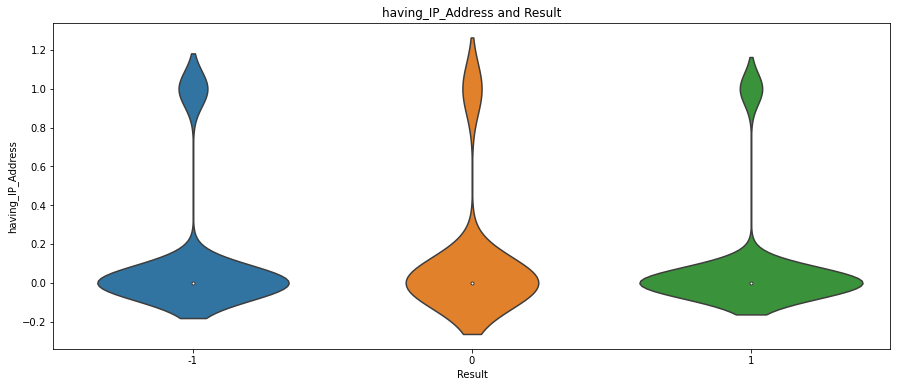

In [13]:
fig, ax = plt.subplots(figsize=(15,6))
sns.violinplot(y = df['having_IP_Address'], x = df['Result'], ax=ax)
plt.title("having_IP_Address and Result")
plt.show()

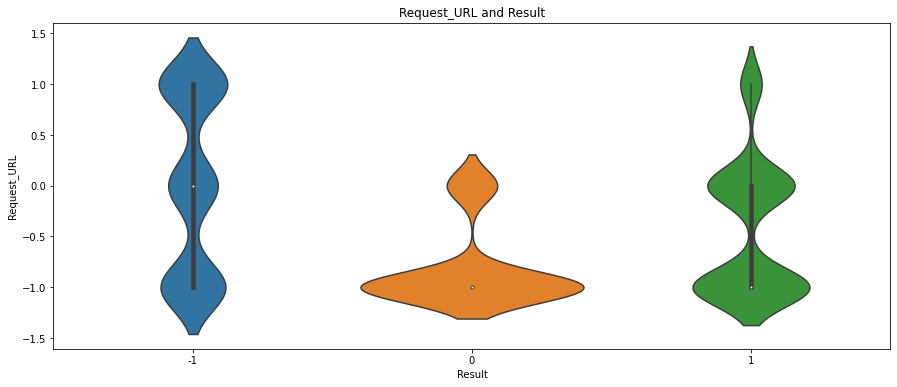

In [14]:
fig, ax = plt.subplots(figsize=(15,6))
sns.violinplot(y = df['Request_URL'], x = df['Result'], ax=ax)
plt.title("Request_URL and Result")
plt.show()

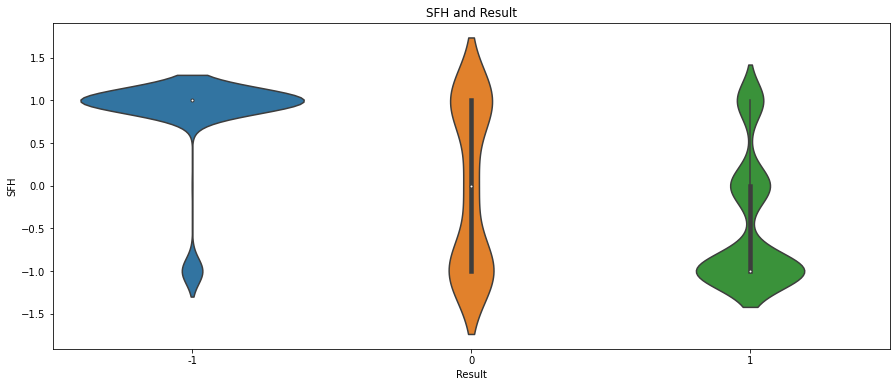

In [15]:
fig, ax = plt.subplots(figsize=(15,6))
sns.violinplot(y = df['SFH'], x = df['Result'], ax=ax)
plt.title("SFH and Result")
plt.show()

<AxesSubplot:>

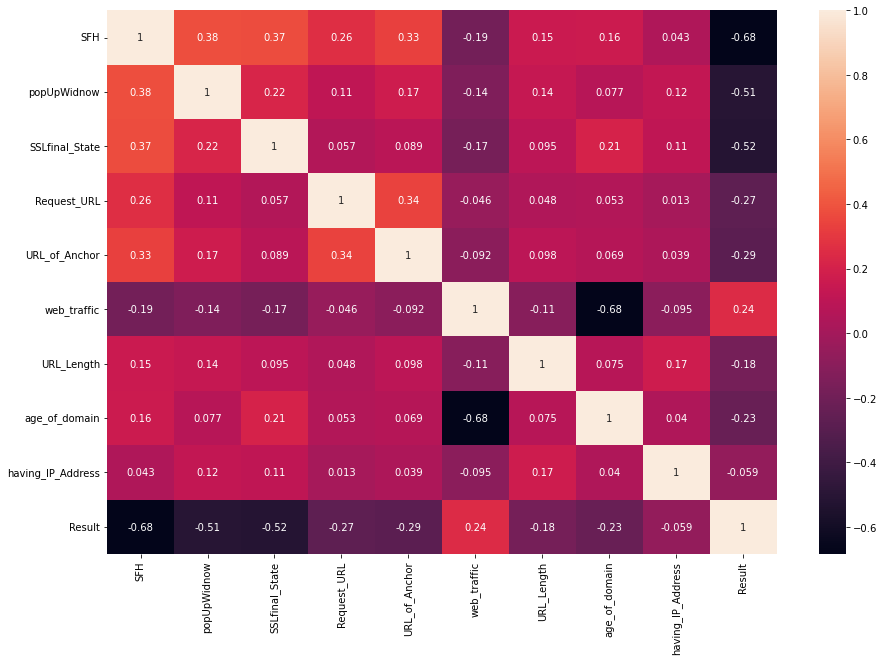

In [16]:
# Heatmap plot diagram
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), ax=ax, annot=True)

In [17]:
df.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


Spliting Train/Test:

In [18]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='Result', axis=1)
#Response variable
y = df.loc[:,'Result'] 

In [19]:
X

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address
0,1,-1,1,-1,-1,1,1,1,0
1,-1,-1,-1,-1,-1,0,1,1,1
2,1,-1,0,0,-1,0,-1,1,0
3,1,0,1,-1,-1,0,1,1,0
4,-1,-1,1,-1,0,0,-1,1,0
...,...,...,...,...,...,...,...,...,...
1348,-1,-1,-1,-1,-1,-1,0,1,0
1349,-1,0,1,0,-1,0,0,1,0
1350,-1,0,-1,-1,-1,0,-1,-1,0
1351,0,0,1,0,0,0,-1,1,0


In [20]:
y

0       0
1       1
2       1
3       0
4       1
       ..
1348    1
1349   -1
1350    1
1351    1
1352   -1
Name: Result, Length: 1353, dtype: int64

In [21]:
#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))

Number of training dataset:  947
Number of test dataset:  406
Total number of dataset:  1353


In [22]:
def qul_No_qul_bar_plot(df, bygroup):
    dataframe_by_Group = pd.crosstab(df[bygroup], columns=df["Result"], normalize = 'index')
    dataframe_by_Group = np.round((dataframe_by_Group * 100), decimals=2)
    ax = dataframe_by_Group.plot.bar(figsize=(15,7));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(dataframe_by_Group.index,rotation = 0, fontsize = 15);
    ax.set_title(' given attributes (%) (by ' + dataframe_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(dataframe_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    return dataframe_by_Group



Result,-1,0,1
having_IP_Address,,,
0,50.92,7.51,41.57
1,59.35,8.39,32.26


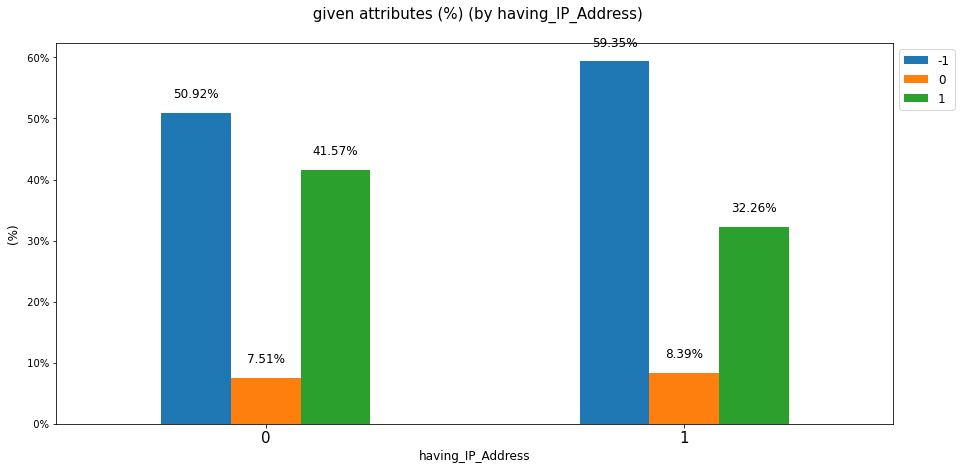

In [23]:
qul_No_qul_bar_plot(df, 'having_IP_Address')